Housing Dataset

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv("Housing.csv")

dataset




,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [44]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


features and target

In [45]:
y = dataset.price
X = dataset.drop("price", axis=1)


Data pre-processing

In [46]:

for column in ["mainroad","guestroom","basement", "hotwaterheating","airconditioning", "prefarea"]:
   X[column] = X[column] == "yes"

X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,True,False,False,False,True,2,True,furnished
1,8960,4,4,4,True,False,False,False,True,3,False,furnished
2,9960,3,2,2,True,False,True,False,False,2,True,semi-furnished
3,7500,4,2,2,True,False,True,False,True,3,True,furnished
4,7420,4,1,2,True,True,True,False,True,2,False,furnished


np.float64(0.5359973457780801)

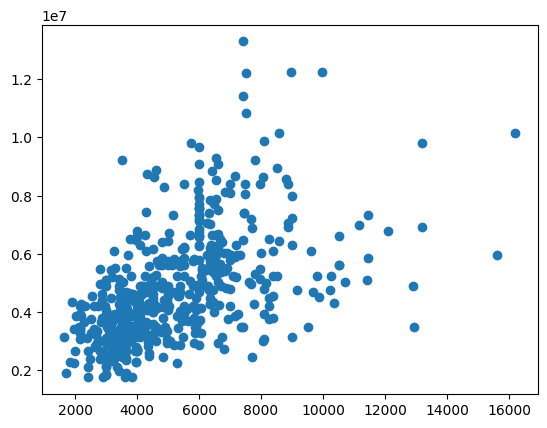

In [47]:
area = X.area

plt.scatter(area, y)

area.corr(y)

np.float64(0.3664940257738684)

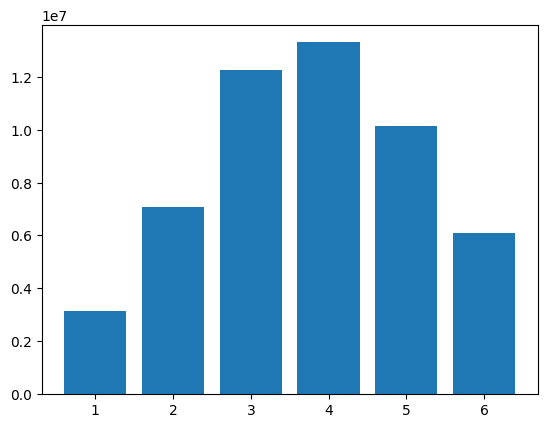

In [48]:
X
bedrooms = X.bedrooms

plt.bar(bedrooms, y)
bedrooms.corr(y)

np.float64(0.4207123661886168)

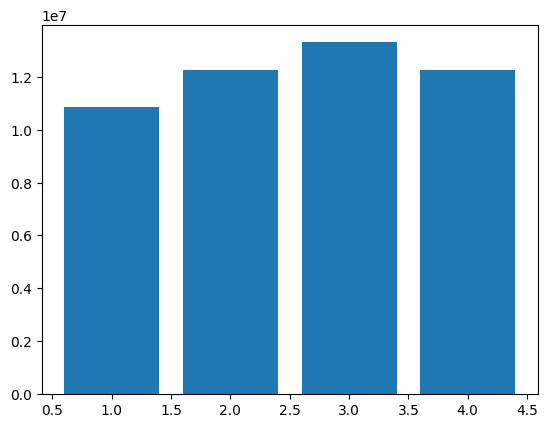

In [49]:
X
stories = X.stories
plt.bar(stories, y)

stories.corr(y)

<BarContainer object of 545 artists>

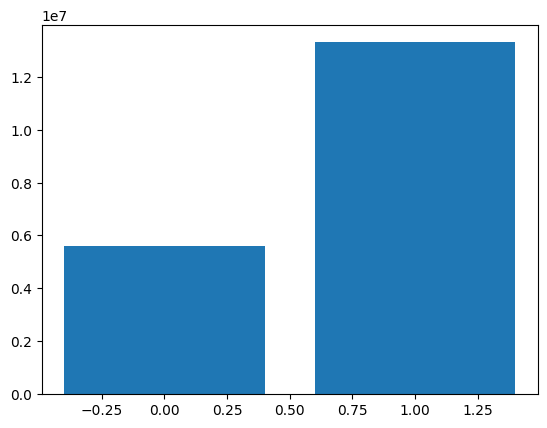

In [50]:
X
mainroad = X.mainroad

plt.bar(mainroad, y)

np.float64(0.3843936486357261)

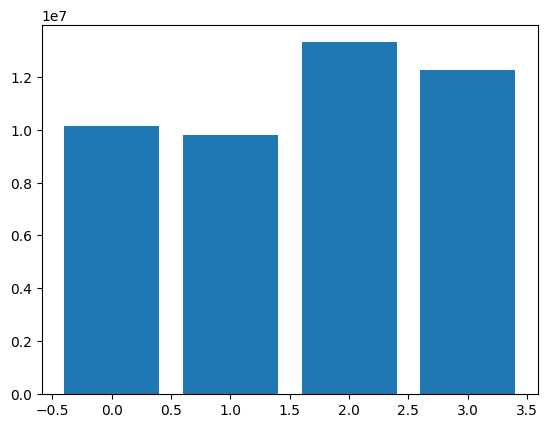

In [51]:
X

parking = X.parking

plt.bar(parking, y)

parking.corr(y)

One input regression model: area and price

In [52]:
area = area.to_numpy().reshape(-1,1)



In [53]:
y = y.to_numpy().reshape(-1,1)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

XTrain, XTest, yTrain, yTest = train_test_split(area, y, test_size=0.2, random_state=0)

In [55]:
lin_reg = LinearRegression()
lin_reg.fit(XTrain, yTrain)

LinearRegression()

In [56]:
pred = lin_reg.predict(XTest)

mse = np.sqrt(mean_squared_error(yTest,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 1.41e+06 (29.6%)


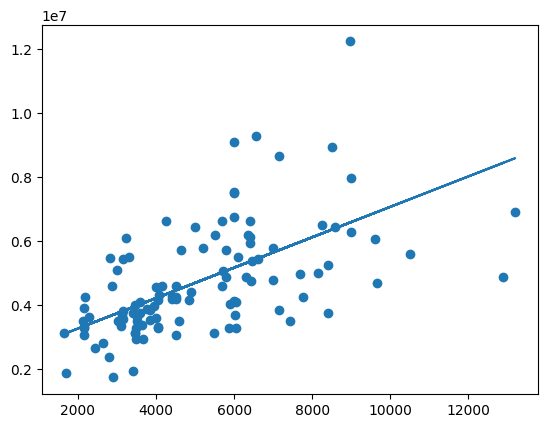

In [57]:
plt.scatter(XTest, yTest)
plt.plot(XTest,pred)

Polynomial Regression on Area

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(XTrain, yTrain)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Mean error: 2.06e+06 (43.2%)


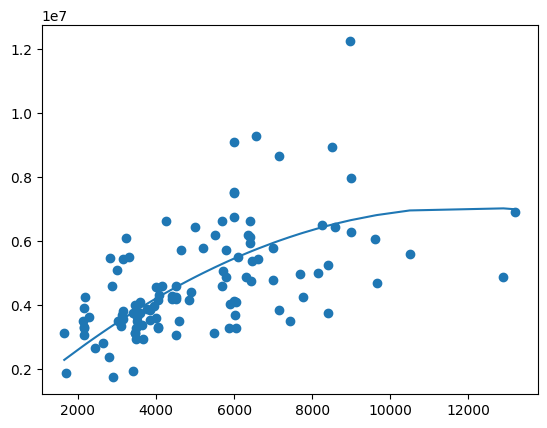

In [59]:
pred2 = pipeline.predict(sorted(XTest))

mse2 = np.sqrt(mean_squared_error(yTest,pred2))
print(f'Mean error: {mse2:3.3} ({mse2/np.mean(pred)*100:3.3}%)')

plt.scatter(XTest, yTest)
plt.plot(sorted(XTest),pred2)


Multiple features

In [60]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,True,False,False,False,True,2,True,furnished
1,8960,4,4,4,True,False,False,False,True,3,False,furnished
2,9960,3,2,2,True,False,True,False,False,2,True,semi-furnished
3,7500,4,2,2,True,False,True,False,True,3,True,furnished
4,7420,4,1,2,True,True,True,False,True,2,False,furnished


In [61]:
features = pd.get_dummies(X.furnishingstatus).join(X.mainroad).join(X.guestroom).join(X.basement).join(X.hotwaterheating).join(X.airconditioning).join(X.prefarea) \
.join(X.bedrooms).join(X.bathrooms).join(X.stories)

In [62]:
XTrain, XTest, yTrain, yTest = train_test_split(features, y, test_size=0.2, random_state=0)

pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())
pipeline.fit(XTrain,yTrain)

# predict results for test data
pred = pipeline.predict(XTest)

# calculate MSE and determination
mse = np.sqrt(mean_squared_error(yTest,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(XTrain,yTrain)
print('Model determination: ', score)

Mean error: 9.79e+14 (1.15e+03%)
Model determination:  0.8929338493561743
